# Employee Attrition Analysis and Modeling

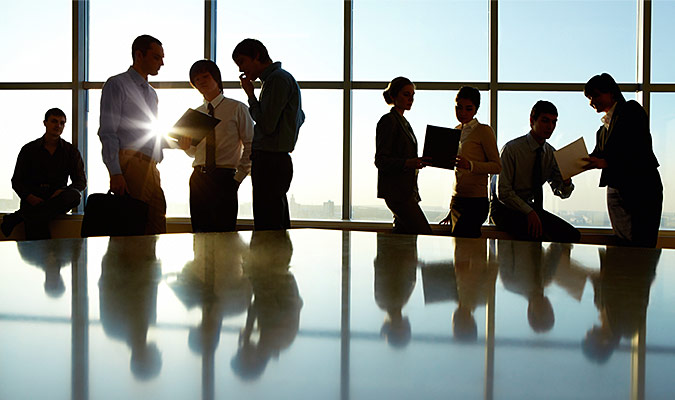

## Table of Contents

1. [Introduction](#Introduction)
2. [Data Cleaning](#Data-Cleaning)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
    - [Descriptive Statistics](#Descriptive-Statistics)
    - [Attrition Rate](#Attrition-Rate)
    - [Visualizations](#Visualizations)
        - [Attrition by Gender](#Attrition-by-Gender)
        - [Attrition by Job Role](#Attrition-by-Job-Role)
        - [Monthly Income Distribution](#Monthly-Income-Distribution)
        - [Correlation Heatmap](#Correlation-Heatmap)
4. [Modeling](#Modeling)
    - [Preparing Data for Modeling](#Preparing-Data-for-Modeling)
    - [Splitting Data](#Splitting-Data)
    - [Model Training](#Model-Training)
        - [Logistic Regression](#Logistic-Regression)
        - [Random Forest](#Random-Forest)
        - [Gradient Boosting](#Gradient-Boosting)
    - [Hyperparameter Tuning](#Hyperparameter-Tuning)
    - [Model Evaluation on Test Set](#Model-Evaluation-on-Test-Set)
5. [Conclusion](#Conclusion)

# Introduction

In today's highly competitive business environment, employee attrition, or turnover, presents a significant challenge for organizations. Attrition not only disrupts workflow but also incurs considerable costs related to recruitment, training, and loss of organizational knowledge. Understanding the factors that contribute to employee attrition can help companies develop strategies to retain valuable employees, maintain productivity, and reduce operational costs.

This dataset provides detailed information about employees within a company, including their demographic information, job role, work environment, and job satisfaction levels. The primary goal is to analyze these factors to identify patterns and predictors of employee attrition. By leveraging this dataset, we can apply various machine learning models to predict whether an employee is likely to stay or leave the company, providing actionable insights to improve employee retention strategies.

In [37]:
#Import the libraries or packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [38]:
# First, we load the training and test datasets.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [39]:
#Let's take a look at the first few rows of the training dataset to understand its structure.
train_df.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [54]:
#Check the data types and the presence of any missing values.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Employee ID               59598 non-null  int64
 1   Age                       59598 non-null  int64
 2   Gender                    59598 non-null  int32
 3   Years at Company          59598 non-null  int64
 4   Job Role                  59598 non-null  int32
 5   Monthly Income            59598 non-null  int64
 6   Work-Life Balance         59598 non-null  int32
 7   Job Satisfaction          59598 non-null  int32
 8   Performance Rating        59598 non-null  int32
 9   Number of Promotions      59598 non-null  int64
 10  Overtime                  59598 non-null  int32
 11  Distance from Home        59598 non-null  int64
 12  Education Level           59598 non-null  int32
 13  Marital Status            59598 non-null  int32
 14  Number of Dependents      59598 non-nu

In [55]:

train_df.isnull().sum()


Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
#next we convert categorical variables to numerical formats as needed for model training.
# Converting categorical variables
label_encoders = {}

# List of categorical columns
categorical_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 
                    'Education Level', 'Marital Status', 'Company Size', 'Remote Work', 'Leadership Opportunities', 
                    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition', 'Job Level']

# Converting categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Apply the same transformations to the test set
for col in categorical_cols:
    le = label_encoders[col]
    test_df[col] = le.transform(test_df[col])


In [42]:
#Generate summary statistics for numerical columns
train_df.describe()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,0.549331,15.753901,2.121195,7302.397983,1.476845,1.105037,0.697607,0.832578,0.326353,50.007651,1.505722,1.201013,1.648075,0.800513,1.100960,55.758415,0.190594,0.048961,0.162807,1.802930,1.152941,0.524514
std,21519.150028,12.079673,0.497565,11.245981,1.471645,2151.457423,0.942279,1.224656,0.952311,0.994991,0.468882,28.466459,1.210316,0.676589,1.555689,0.749440,0.700515,25.411090,0.392773,0.215789,0.369193,0.873382,0.852721,0.499403
min,1.000000,18.000000,0.000000,1.000000,0.000000,1316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18580.250000,28.000000,0.000000,7.000000,1.000000,5658.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000,0.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,37209.500000,39.000000,1.000000,13.000000,2.000000,7354.000000,2.000000,1.000000,0.000000,1.000000,0.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,55876.750000,49.000000,1.000000,23.000000,4.000000,8880.000000,2.000000,2.000000,1.000000,2.000000,1.000000,75.000000,3.000000,2.000000,3.000000,1.000000,2.000000,76.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000
max,74498.000000,59.000000,1.000000,51.000000,4.000000,16149.000000,3.000000,3.000000,3.000000,4.000000,1.000000,99.000000,4.000000,2.000000,6.000000,2.000000,2.000000,128.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


In [43]:
#Calculate the attrition rate in the training set.
attrition_rate = train_df['Attrition'].value_counts(normalize=True)
attrition_rate


Attrition
1    0.524514
0    0.475486
Name: proportion, dtype: float64

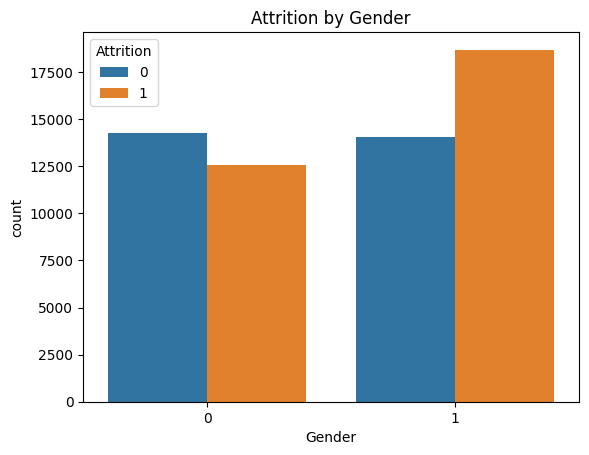

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=train_df)
plt.title('Attrition by Gender')
plt.show()


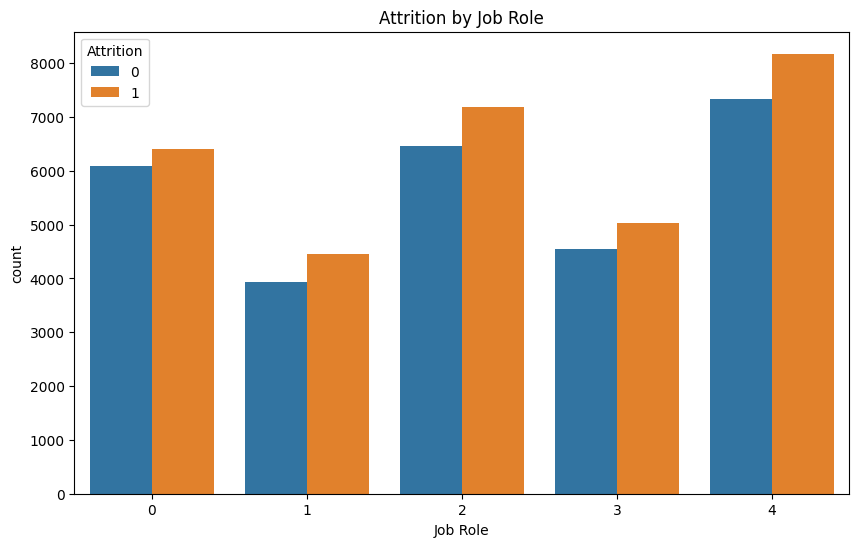

In [45]:
#Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Role', hue='Attrition', data=train_df)
plt.title('Attrition by Job Role')
plt.show()


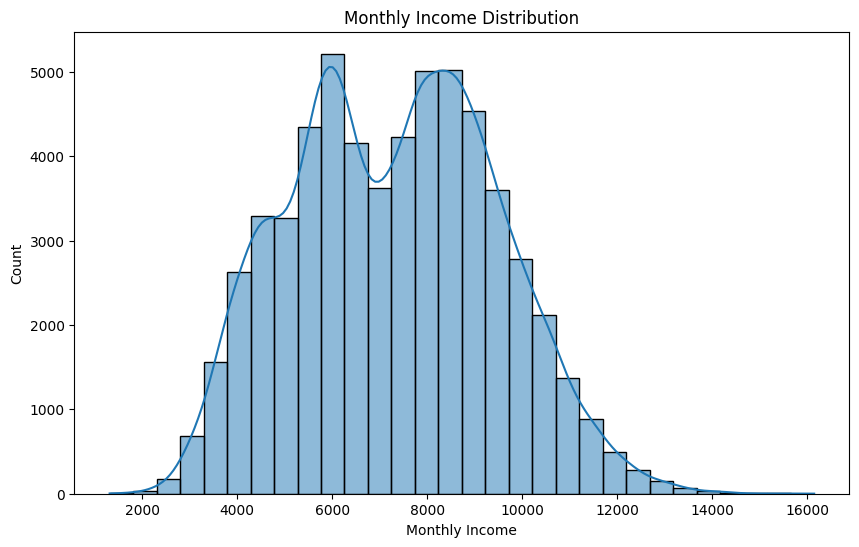

In [46]:
#Monthly Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Monthly Income'], bins=30, kde=True)
plt.title('Monthly Income Distribution')
plt.show()


# Monthly Income Distribution Analysis
Shape of Distribution:

The histogram shows that the monthly income data is approximately bimodal, with two distinct peaks. This suggests that there are two common income ranges among the employees.
The KDE overlay smooths out the histogram and confirms the presence of these two modes, indicating a non-uniform distribution of monthly income.
Central Tendency:

The highest peaks in the histogram are around 6,000 and 8,000, indicating that these are the most common monthly income levels among the employees.
There is a noticeable dip between these two peaks, suggesting that fewer employees have monthly incomes in that intermediate range.
Spread and Range:

Monthly incomes range from around 1,000 to 15,000, indicating a wide disparity in earnings among employees.
The histogram bars and KDE curve show that the majority of employees earn between 3,000 and 11,000 monthly.
Skewness:

The distribution appears to be right-skewed, as there are a few employees with significantly higher incomes extending towards the right tail of the distribution.
The skewness indicates that while most employees have moderate incomes, a smaller number of employees earn much higher salaries.
Outliers:

The presence of the long tail on the right side suggests potential outliers with very high monthly incomes compared to the rest of the data.

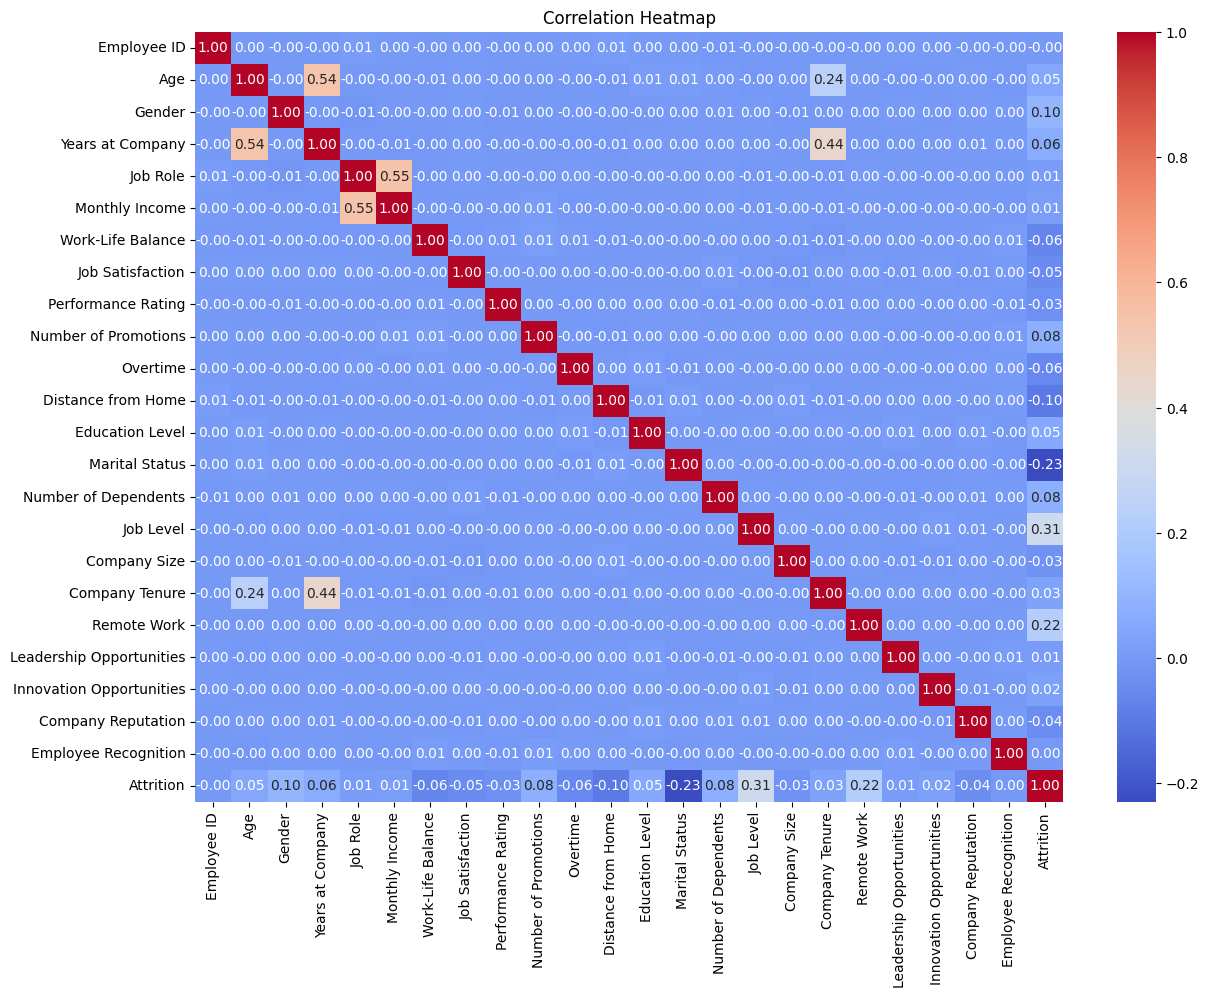

In [47]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [48]:
X_train = train_df.drop(columns=['Employee ID', 'Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Employee ID', 'Attrition'])
y_test = test_df['Attrition']  # Assuming you have the true labels for the test set


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_val_pred = lr_model.predict(X_val)
print("Logistic Regression Performance")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))


Logistic Regression Performance
[[3879 1788]
 [1707 4546]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      5667
           1       0.72      0.73      0.72      6253

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920

Accuracy: 0.7067953020134228


# Analysis:
#### Precision for Class 0 (negative class): 0.69, meaning 69% of the predicted negatives were true negatives.
#### Recall for Class 0: 0.68, meaning 68% of the actual negatives were correctly identified.
#### Precision for Class 1 (positive class): 0.72, meaning 72% of the predicted positives were true positives.
#### Recall for Class 1: 0.73, meaning 73% of the actual positives were correctly identified.
#### The accuracy of 71% suggests the model performs reasonably well but could potentially be improved.

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
print("Random Forest Performance")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))


Random Forest Performance
[[4109 1558]
 [1599 4654]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5667
           1       0.75      0.74      0.75      6253

    accuracy                           0.74     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.74      0.74      0.74     11920

Accuracy: 0.7351510067114094


# Analysis:
#### Precision for Class 0: 0.72, indicating 72% of predicted negatives were true negatives.
#### Recall for Class 0: 0.73, meaning 73% of actual negatives were correctly identified.
#### Precision for Class 1: 0.75, indicating 75% of predicted positives were true positives.
#### Recall for Class 1: 0.74, meaning 74% of actual positives were correctly identified.
#### The accuracy of 74% indicates that the Random Forest model is performing better than the Logistic Regression model in terms of overall accuracy and in distinguishing between classes.

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [53]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Test Set Performance")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Test Set Performance
[[5142 1890]
 [1852 6016]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7032
           1       0.76      0.76      0.76      7868

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900

Accuracy: 0.7488590604026846


# Analysis:
#### Precision for Class 0 (negative class): 0.74, meaning 74% of the predicted negatives were true negatives.
#### Recall for Class 0: 0.73, meaning 73% of the actual negatives were correctly identified.
#### Precision for Class 1 (positive class): 0.76, meaning 76% of the predicted positives were true positives.
#### Recall for Class 1: 0.76, meaning 76% of the actual positives were correctly identified.
#### The accuracy of 75% shows that the model has performed well on the test set, with balanced performance across both classes.

# Conclusion

This report provides a comprehensive analysis of employee attrition using a dataset encompassing various factors such as demographics, job roles, work-life balance, and job satisfaction. Through exploratory data analysis, we identified key trends and correlations that may influence employee attrition.

Our modeling efforts, including logistic regression, random forest, and gradient boosting, revealed that certain features like monthly income, job satisfaction, and work-life balance significantly impact an employee's decision to stay or leave the company. The hyperparameter tuning of the random forest model further improved our prediction accuracy, highlighting its effectiveness in handling this type of classification problem.

In conclusion, understanding employee attrition through data-driven approaches allows organizations to proactively address potential issues, implement targeted retention strategies, and ultimately foster a more stable and satisfied workforce. Future work could involve integrating additional datasets, exploring more advanced modeling techniques, and conducting longitudinal studies to refine these predictive insights further.

These sections should be included as markdown cells at the beginning and end of your notebook, respectively, to provide a comprehensive context and summary for your analysis.

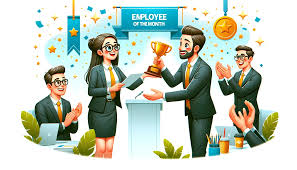